In [2]:
import pandas as pd
from Data_preparation_Library import *
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
from time import time
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import load_model
from random import choice
from scipy import signal
from pickle import load
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [19]:
file = 'Subjects/Nikhil/computed_Hammer.csv'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle']
df = pd.read_csv(file,index_col=0)

In [12]:
b,a = signal.butter(3, 3,fs=2000)
for labels in emg_labels:
    df[labels] = signal.lfilter(b, a,abs(df[labels]))

In [13]:
b,a = signal.butter(3, 3,fs=2000)
for labels in angle_lables:
    df[labels] = signal.lfilter(b, a,df[labels])

<AxesSubplot:title={'center':'Subjects/Nikhil/computed_Hammer.csv'}>

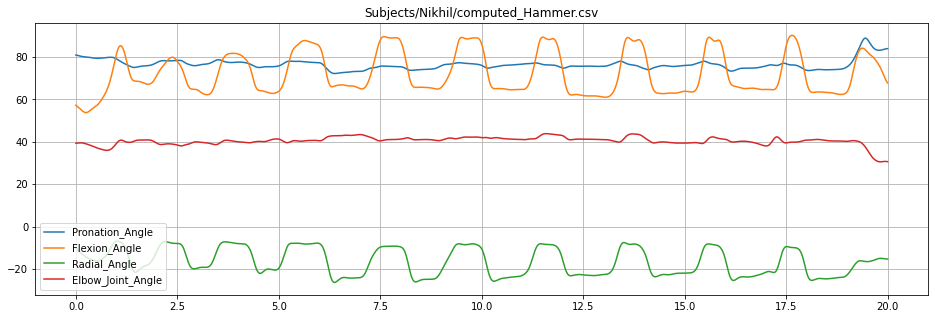

In [14]:
df = df[10000:50000]
df.index = np.linspace(0,int(df.shape[0]/2000),df.shape[0])
df[angle_lables].plot(figsize=(16,5),title=file,grid=True)

<AxesSubplot:title={'center':'Subjects/Nikhil/computed_Hammer.csv'}>

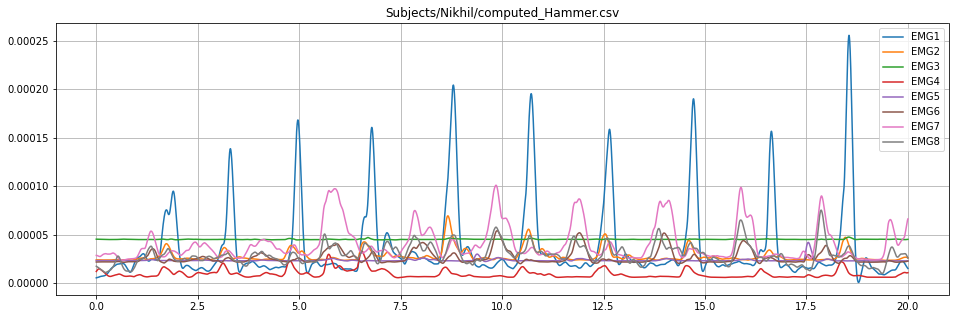

In [15]:
df[emg_labels].plot(figsize=(16,5),title=file,grid=True)

<AxesSubplot:title={'center':'Subjects/Nikhil/computed_Hammer.csv'}>

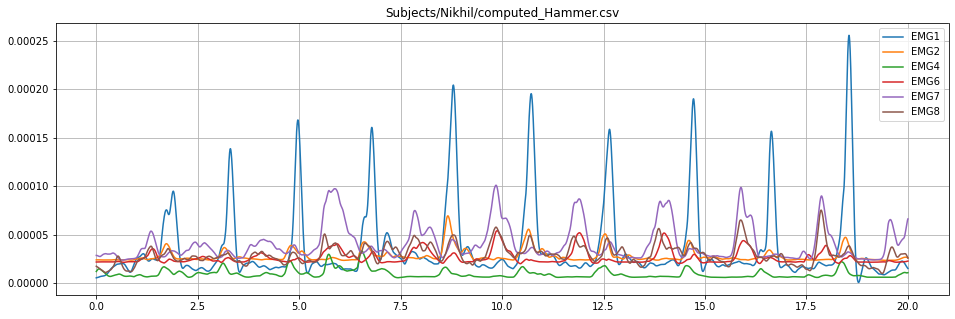

In [16]:
df[emg_labels].drop(columns=['EMG3','EMG5']).plot(figsize=(16,5),title=file,grid=True)

<AxesSubplot:title={'center':'Subjects/Nikhil/computed_Hammer.csv'}>

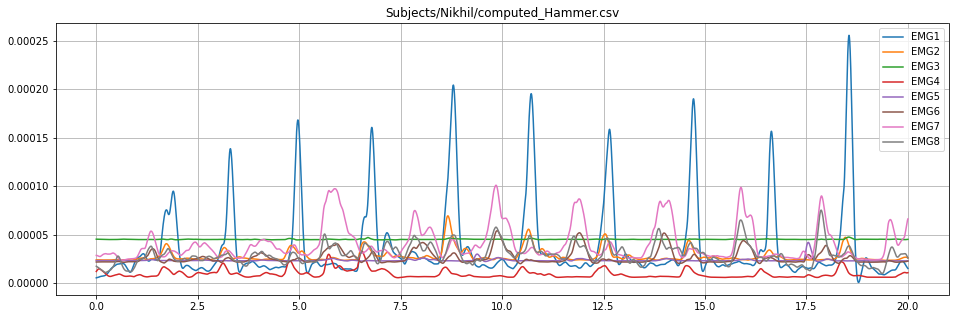

In [17]:
df.index = np.linspace(0,int(df.shape[0]/2000),df.shape[0])
df[emg_labels].plot(figsize=(16,5),title=file,grid=True)

<AxesSubplot:title={'center':'Pronation-Supination Angular Velocity'}, xlabel='Time', ylabel='Angular Velocity (deg/s)'>

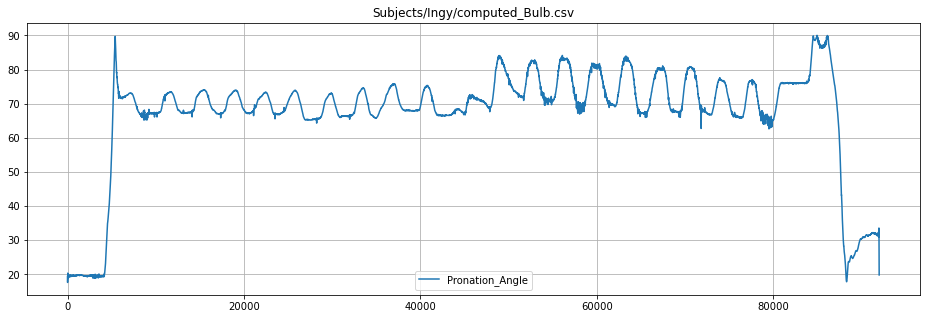

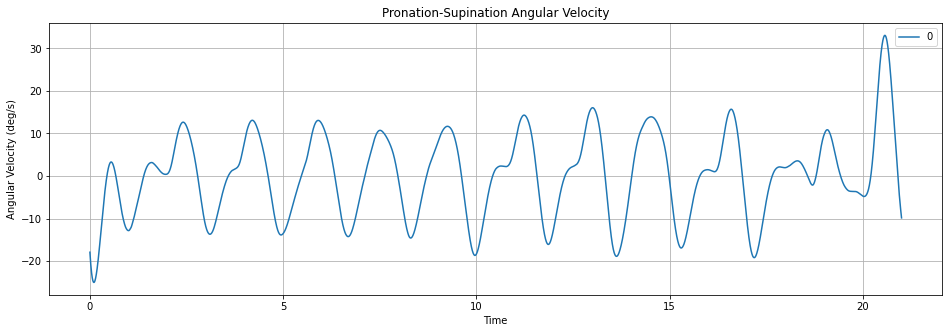

In [19]:
file = 'Subjects/Ingy/computed_Bulb.csv'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle'] # 'Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle'
df = pd.read_csv(file,index_col=0)#[62500:69000]#[4500:85000]#[72500:82500]
df[angle_lables].plot(figsize=(16,5),title=file,grid=True)

b,a = signal.butter(3, 3,fs=2000)
for labels in emg_labels:
    df[labels] = signal.lfilter(b, a,abs(df[labels]))
    
arr = np.diff(list(df['Pronation_Angle'])+[list(df['Pronation_Angle'].values)[-1]])
arr = arr/(1/2000)
b,a = signal.butter(3, 1,fs=2000)
arr = signal.lfilter(b, a,arr)
df_vel = pd.DataFrame(arr[6500:50000])
df_vel.index = np.linspace(0,int(df_vel.shape[0]/2000),df_vel.shape[0])
df_vel.plot(figsize=(16,5),title='Pronation-Supination Angular Velocity',grid=True, ylabel='Angular Velocity (deg/s)',xlabel='Time')

<AxesSubplot:title={'center':'Subjects/Ingy/computed_Bulb.csv'}>

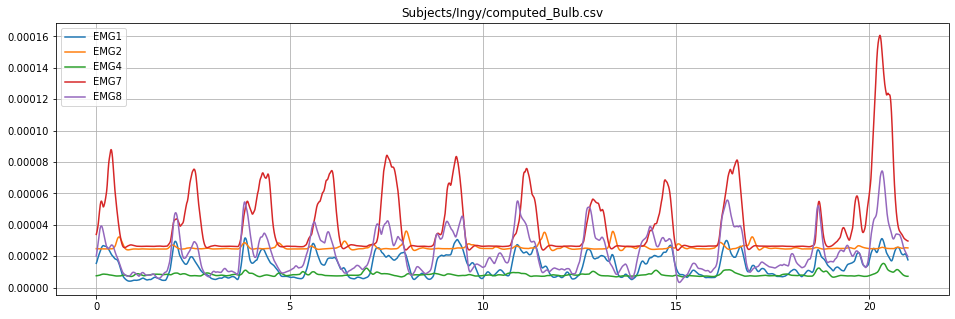

In [20]:
df = df[6500:50000]
df.index = np.linspace(0,int(df.shape[0]/2000),df.shape[0])
df[emg_labels].drop(columns=['EMG3','EMG5','EMG6']).plot(figsize=(16,5),title=file,grid=True)

<AxesSubplot:title={'center':'DTM Angular Velocity'}, xlabel='Time', ylabel='Angular Velocity (deg/s)'>

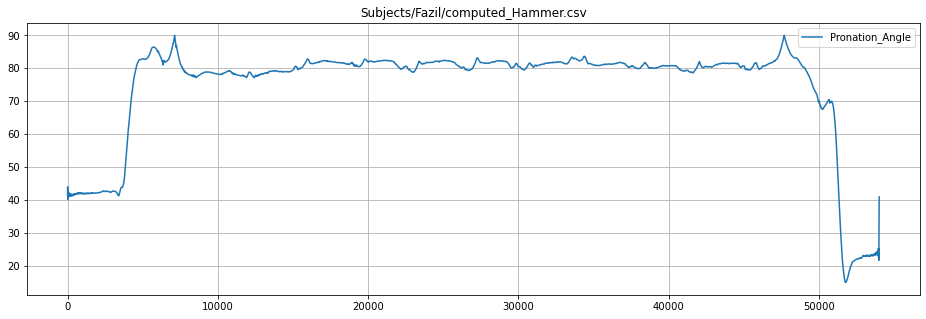

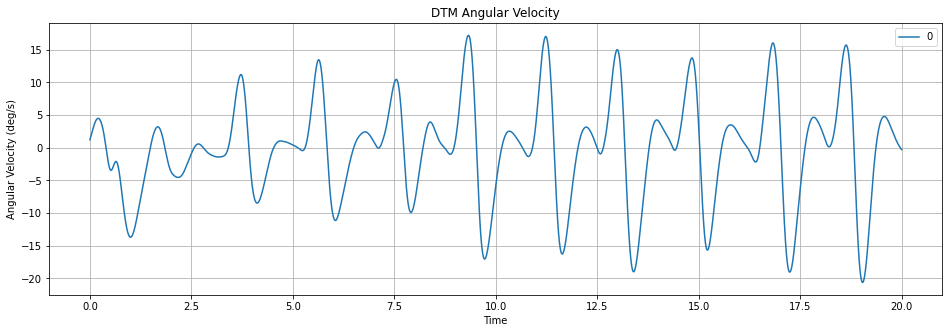

In [27]:
file = 'Subjects/Fazil/computed_Hammer.csv'
emg_labels = ['EMG1','EMG2','EMG3','EMG4','EMG5','EMG6','EMG7','EMG8']
angle_lables = ['Pronation_Angle'] # 'Pronation_Angle','Flexion_Angle',  'Radial_Angle','Elbow_Joint_Angle'
df = pd.read_csv(file,index_col=0)#[62500:69000]#[4500:85000]#[72500:82500]
df[angle_lables].plot(figsize=(16,5),title=file,grid=True)

b,a = signal.butter(3, 3,fs=2000)
for labels in emg_labels:
    df[labels] = signal.lfilter(b, a,abs(df[labels]))
    
arr = np.diff(list(df['DTM_Angle'])+[list(df['DTM_Angle'].values)[-1]])
arr = arr/(1/2000)
b,a = signal.butter(3, 1,fs=2000)
arr = signal.lfilter(b, a,arr)
df_vel = pd.DataFrame(arr[4500:2000*20+4500])
df_vel.index = np.linspace(0,int(df_vel.shape[0]/2000),df_vel.shape[0])
df_vel.plot(figsize=(16,5),title='DTM Angular Velocity',grid=True, ylabel='Angular Velocity (deg/s)',xlabel='Time')

In [28]:
df = df[4500:2000*20+4500]
df.index = np.linspace(0,int(df.shape[0]/2000),df.shape[0])

<AxesSubplot:title={'center':'Subjects/Fazil/computed_Hammer.csv'}>

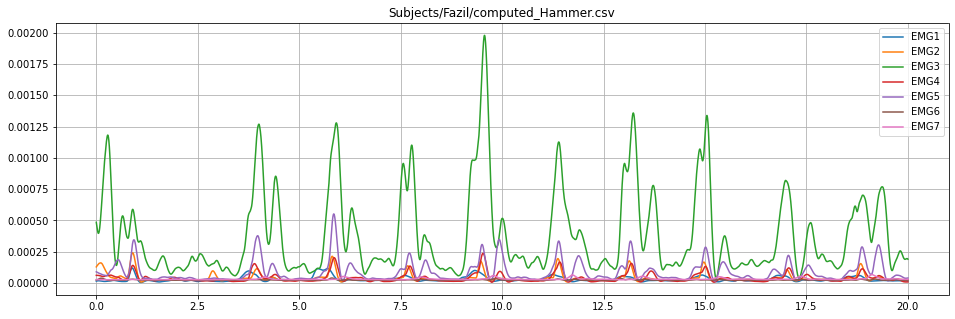

In [29]:
df[emg_labels].drop(columns=['EMG8']).plot(figsize=(16,5),title=file,grid=True)